## Dimensionality reduction

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
path_df = r'C:\Users\nikos\Desktop\Classify reviews\Pickles\df.pickle'
with open(path_df, 'rb') as data:
    df = pickle.load(data)

path_X_train = r'C:\Users\nikos\Desktop\Classify reviews\Pickles\X_train.pickle'
with open(path_X_train, 'rb') as data:
     X_train = pickle.load(data)

path_X_test = r'C:\Users\nikos\Desktop\Classify reviews\Pickles\X_test.pickle'
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

path_y_train = r'C:\Users\nikos\Desktop\Classify reviews\Pickles\y_train.pickle'
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

path_y_test = r'C:\Users\nikos\Desktop\Classify reviews\Pickles\y_test.pickle'
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

In [3]:
print(X_train.shape)
print(X_test.shape)

(960, 500)
(241, 500)


In [4]:
## Concatenate the features and the labels
features = np.concatenate((X_train,X_test), axis=0)
labels = np.concatenate((y_train,y_test), axis=0)

In [5]:
print(features.shape)
print(labels.shape)

(1201, 500)
(1201,)


In [6]:
## Concatenate features, labels
df_feat = pd.DataFrame(features)
df_lab = pd.DataFrame(labels, columns=["Target"])
new_df = pd.concat([df_feat, df_lab], axis=1)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Target
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.067488,0.047830,0.0,...,0.0,0.128368,0.0,0.105935,0.000000,0.0,0.000000,0.000000,0.0,7
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.101929,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.086560,0.000000,0.0,4
2,0.0,0.0,0.084353,0.0,0.0,0.000000,0.0,0.000000,0.176502,0.0,...,0.0,0.000000,0.0,0.000000,0.166024,0.0,0.000000,0.000000,0.0,2
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.117620,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.070791,0.128551,0.0,6
4,0.0,0.0,0.000000,0.0,0.0,0.083537,0.0,0.000000,0.056671,0.0,...,0.0,0.000000,0.0,0.074132,0.000000,0.0,0.000000,0.000000,0.0,3


#### Principal Component Analysis: this technique relies on the obtention of the eigenvalues and eigenvectors of the data matrix and tries to provide a minimum number of variables that keep the maximum amount of variance.

#### t-SNE: the t-distributed Stochastic Neighbour Embedding is a probabilistic technique particularly well suited for the visualization of high-dimensional datasets. It minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

In [7]:
## Apply feature reduction methods
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(new_df)

PCA(n_components=2)

In [8]:
x_pca = pca.transform(new_df)
x_pca.shape

(1201, 2)

In [9]:
## Let's look at the variance ratio of the first two compoments  
pca.explained_variance_ratio_

array([0.86541555, 0.00568715])

Text(0, 0.5, 'cumulative explained variance')

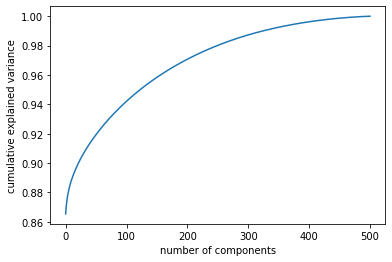

In [10]:
## Choosing the right numbers of dimensions
pca = PCA().fit(new_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [11]:
from sklearn.manifold import TSNE

In [12]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(df_feat)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=df_lab)
    df_full = pd.concat([df_features, df_labels], axis=1)

    # Get labels name
    category_names = {0:'Admin', 1:'Analyst', 2:'cleaner', 3:'Finance', 4:'hospitality',
    5:'recruitment', 6:'Warehouse', 7: 'web developer'}
    
    # And map labels
    df_full['label_name'] = df_full['Target']
    df_full = df_full.replace({'label_name':category_names})
    
    # Plot
    plt.figure(figsize=(10,10))
    sn.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=['blue', 'turquoise',"y","black","g","brown","grey", "pink"],
                    alpha=.7).set_title(title)

    

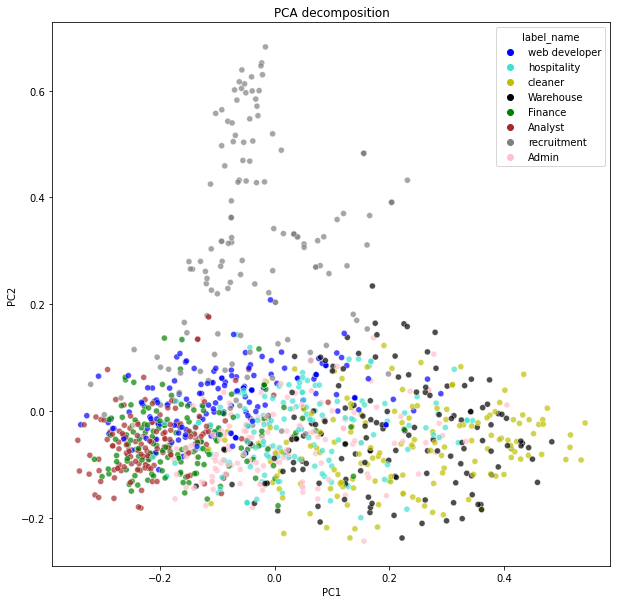

In [13]:
plot_dim_red("PCA", 
             features=df_feat, 
             labels=df_lab,
             n_components=2)

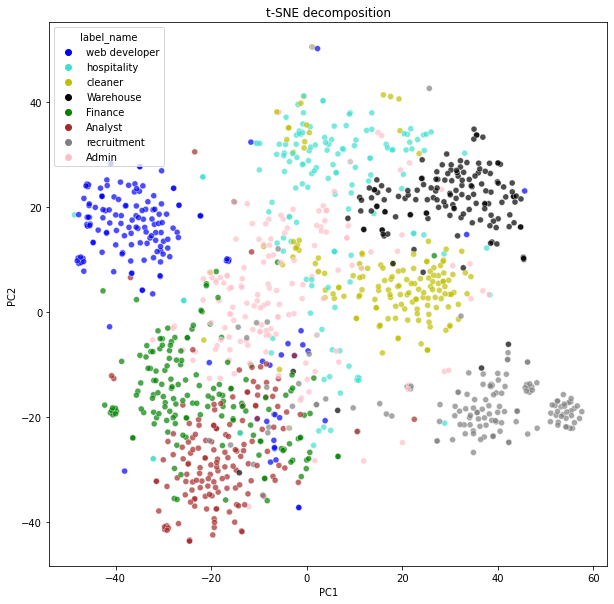

In [14]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

In [15]:
## Let's train a model with 90% proportion of variance

In [16]:
X = new_df.drop(columns = ["Target"])
Y = new_df["Target"]

In [17]:
pca = PCA(n_components=0.90)
X = pca.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 293)
(241, 293)
(960,)
(241,)


In [21]:
# X_train
with open('model_data/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('model_data/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('model_data/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('model_data/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('model_data/df.pickle', 'wb') as output:
    pickle.dump(new_df, output)
    
# pca 
with open('model_data/pca.pickle', 'wb') as output:
    pickle.dump(pca, output)
